# Project Decription

The goal of this project is to develop a machine learning model capable of predicting whether a student has ever overdrawn a checking account based on their Age, Gender, and DaysDrink (the number of days they consume alcohol given a time period). The dataset, titled Project_Data, consists of 450 student records, each containing the three features and the target label: OverDrawn.

The project is structured to mirror a typical data science pipeline, starting from data inspection and preprocessing, through feature selection, model training, evaluation, and selection of the best-performing algorithm. Each section has a short decription explaining why certain decisions were made and the source code. We aim to compare various classification techniques and evaluate their performance using standard metrics such as accuracy and confusion matrix.

This assignment emphasizes the use of manual Python implementation of data preprocessing and modeling techniques, specifically those discussed in Unit 5 of the course.

The following machine learning algorithms will be implemented and compared:

*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Decision Tree
*   Random Forest
*   Support Vector Machine (SVM)

By the end of this project, we will determine which model provides the highest accuracy and is most suitable for predicting overdrawing behavior in students, based on the available features. The results of this analysis can be useful in identifying students at risk of financial mismanagement and guiding support interventions.

# Data Preprocessing

The data preprocessing phase involved careful inspection and cleaning of the Project_Data.csv file to prepare it for model training. This step followed the guidelines and Python implementations described in Unit 5 of the course material.

1. Data Inspection
The dataset was first loaded into a Pandas DataFrame, and the unnamed index column was renamed to ID for better readability. Key structural details such as data types, null values, duplicates, and summary statistics were inspected using built-in Python functions like df.info(), df.describe(), and df.isnull().sum(). The dataset was found to contain:

  * Null values in multiple columns.

  * No duplicate rows.

  * Inconsistent values in the Gender column, including 'M', 'F', 'Male', 'Female', and missing values.

  * Negative values were also checked for all numerical columns. A custom function was used to detect outliers using the Interquartile Range (IQR) method.

2. Data Cleaning
Outliers: While outliers were detected in each numerical column, only the DaysDrink column had outliers that seemed inappropriate. For example, unusually high or low values for alcohol consumption days were removed using the IQR-based filtering method. Other detected outliers, such as Age values between 22 and 25, were not modified because they are reasonable for a college population.

  * Missing values: Rows containing missing values were dropped using dropna().

  * Duplicates: Although none were found, drop_duplicates() was used as a safety step.

  * Gender Encoding: To resolve inconsistencies in the Gender column, all instances of 'M' and 'F' were replaced with 'Male' and 'Female', respectively. The categorical Gender column was then converted to numerical format using one-hot encoding via pd.get_dummies(), resulting in two new binary columns: Gender_Male and Gender_Female.

The cleaned dataset is now ready for the next phase, which involves feature rearrangement and selection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Data Inspection
df = pd.read_csv('Project_Data.csv')

# change the first column for better visualization
df = df.rename(columns={'Unnamed: 0': 'ID'})
df.set_index('ID', inplace=True)

print(df.head(), df.tail())
print(df.describe)
print(df.info())
print(df.shape)
print("\nNull values in the data: ", df.isnull().sum()) # Check for null values on every column
print("\nDuplicate values in the data: ", df.duplicated().sum()) # Check for duplicate values
print("\nData types in the data: ", df.dtypes)

def detect_all_negative_numbers(df, column):
  negative_numbers = df.loc[(df[columns] < 0).any(axis=1)]
  return negative_numbers

columns = []
# finiding colomns with int and float types to avoid checking for negative values in
# a column with non int/float data type
for column in df.columns:
  if (df[column].dtype == 'int64') or (df[column].dtype == 'float64') and (column != "Unnamed: 0"):
    if column == "ID":
      continue
    columns.append(column)
negative_numbers = detect_all_negative_numbers(df, columns)
print("\nNegative numbers in the data: ", negative_numbers) # print negative numbers found
print("\nUnique gender values", df['Gender'].unique()) # checks for inconsistent gender description (Male, Female, M, F, nan)

# User defined function for detecting outliers using quantile methods
def detect_outliers(df, column_name):
  # Calculate the first and third quartiles
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)

  # Calculate the interquartile range (IQR)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers using the upper and lower bounds
  outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
  return outliers

# detects and print outliers using only columns with int or float types
for c in columns:
  print("\nOutliers in column: ", c)
  outliers = detect_outliers(df, c)
  print(outliers)


     Age  Gender  DaysDrink  Overdrawn
ID                                    
1   19.0  Female        3.0        0.0
2   19.0    Male       20.0        0.0
3   19.0    Male        6.0        0.0
4   19.0  Female       10.0        0.0
5   19.0  Female        0.0        0.0       Age  Gender  DaysDrink  Overdrawn
ID                                     
446  19.0  Female        1.0        0.0
447  18.0    Male        0.0        0.0
448  20.0  Female        8.0        1.0
449  19.0  Female        8.0        0.0
450  20.0    Male        0.0        0.0
<bound method NDFrame.describe of       Age  Gender  DaysDrink  Overdrawn
ID                                     
1    19.0  Female        3.0        0.0
2    19.0    Male       20.0        0.0
3    19.0    Male        6.0        0.0
4    19.0  Female       10.0        0.0
5    19.0  Female        0.0        0.0
..    ...     ...        ...        ...
446  19.0  Female        1.0        0.0
447  18.0    Male        0.0        0.0
448  20.0  Fe

In [2]:
# 2. Data Cleaning

# User defined function for dropping  rows that contain outliers
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Filter and keep only non-outlier rows
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# only droped outliers from "DaysDrink" since other outliers were determined to
# be reasonable for a college population
df = drop_outliers(df, "DaysDrink")

# Drop rows with duplicates and missing values
df.drop_duplicates(inplace=True)
df = df.dropna()

# Replace all M -> Male and F -> Female
mapping = {'M': 'Male', 'F': 'Female'}
df['Gender'] = df["Gender"].replace(mapping)

df_encoded = pd.get_dummies(df['Gender'], prefix='Gender') # The name of each
# numeric column starts with what ever is set for prefix followed by
# underscore and name of each category. For example Gender_Male

df = pd.concat([df, df_encoded], axis=1)
print(df_encoded)


     Gender_Female  Gender_Male
ID                             
1             True        False
2            False         True
3            False         True
4             True        False
5             True        False
..             ...          ...
438           True        False
443          False         True
444           True        False
445          False         True
448           True        False

[189 rows x 2 columns]


<ipython-input-2-35320e23cd01>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


# Feature Selection

After cleaning the dataset, the next step was to rearrange and select the features for modeling. The features chosen for this task include:

* Gender_Male
* Gender_Female
* Age
* DaysDrink

These were selected based on the project instructions and because they offer potential predictive insight into whether a student has overdrawn their checking account.

The target variable, Overdrawn, was isolated as the output variable (y), while the remaining columns were used as input features (X). The dataset was then split into training and testing sets using an 70-30 split, with 70% of the data allocated to training and 30% to testing. This approach allows us to evaluate each model’s performance on unseen data and minimize overfitting.

Feature Scaling
No explicit rescaling or normalization was applied to the feature set. This decision was made because:

* Tree-based models such as Decision Trees and Random Forests are not sensitive to feature scaling.

* Logistic Regression and SVM can benefit from scaling, but initial model testing was conducted without it to maintain consistency across models. If necessary, rescaling (e.g., using MinMaxScaler) could be revisited based on model evaluation metrics.

The dataset was successfully prepared for training with the selected features, and all necessary preprocessing steps were completed using only the Python implementations taught in Unit 5.

In [3]:
# 3. Feature Rearangement and Selection

df = df[['Gender_Male', 'Gender_Female', 'Age', 'DaysDrink', 'Overdrawn']]
#print(df.head())

X = df.drop(columns=["Overdrawn"])
y = df["Overdrawn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# 4. Model Trinaing

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=44)
dt.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=44)
rf.fit(X_train, y_train)

# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)


SVC()

# Performance Evaluation

To evaluate the predictive performance of the machine learning models trained on the dataset, two key metrics were used:

Accuracy Score: The percentage of correct predictions made by the model.

Confusion Matrix: A matrix representation of actual vs. predicted classifications, which provides more granular insight into model performance.

Each model was tested on the 30% test set that was separated during the train-test split. The evaluation results for each algorithm are as follows:

1. Logistic Regression
Accuracy: 78.95%

  Confusion Matrix: Visualized to show true positives, false positives, false negatives, and true negatives.

2. K-Nearest Neighbors (KNN)
Accuracy: 78.95%

  The performance of KNN depends heavily on the chosen k value. Here, k=13 was used.

3. Decision Tree
Accuracy: 64.91%

  Decision trees tend to perform well on imbalanced or noisy data but can overfit if not tuned.

4. Random Forest
Accuracy: 56.14%

  Random Forest generally improves accuracy and reduces overfitting by aggregating the results of multiple decision trees.

5. Support Vector Machine (SVM)
Accuracy: 85.96%

  SVMs perform well in high-dimensional spaces and are effective for binary classification problems like this one.

All confusion matrices were visualized using a custom plotting function, providing a clear overview of how each model predicted the test labels.

These evaluation metrics allow us to compare the models objectively and identify the most effective one for predicting whether a student will overdraw their checking account.


Logistic Regression Accuracy: 78.95%


<ipython-input-11-49add2e65f27>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 400x400 with 0 Axes>

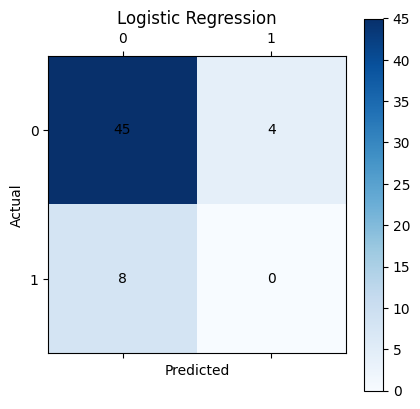


KNN Accuracy: 78.95%


<ipython-input-11-49add2e65f27>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 400x400 with 0 Axes>

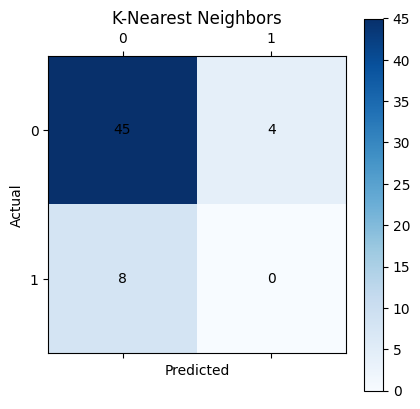


Decision Tree Accuracy: 64.91%


<ipython-input-11-49add2e65f27>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 400x400 with 0 Axes>

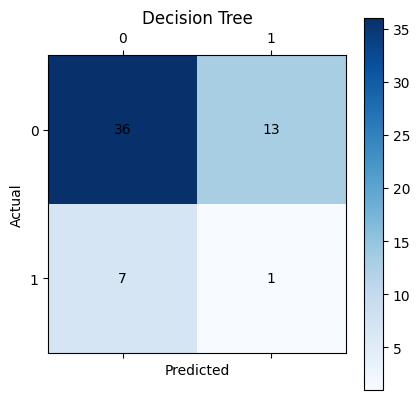


Random Forest Accuracy: 56.14%


<ipython-input-11-49add2e65f27>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 400x400 with 0 Axes>

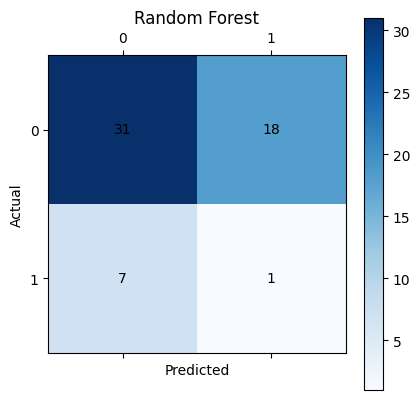


SVM Accuracy: 85.96%


<ipython-input-11-49add2e65f27>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 400x400 with 0 Axes>

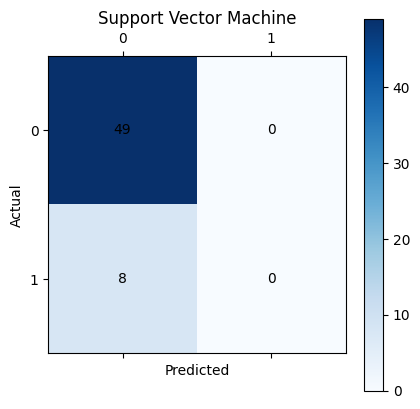

In [11]:

# 5. Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    # The fignum argument was causing the error. Removing it or setting
    # it to None should fix the issue.
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.tight_layout()
    plt.show()

# Logistic Regression
y_pred = clf.predict(X_test)
print("\nLogistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
plot_confusion(y_test, y_pred, "Logistic Regression")

# KNN
y_pred_knn = knn.predict(X_test)
print("\nKNN Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn) * 100))
plot_confusion(y_test, y_pred_knn, "K-Nearest Neighbors")

# Decision Tree
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_dt) * 100))
plot_confusion(y_test, y_pred_dt, "Decision Tree")

# Random Forest
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
plot_confusion(y_test, y_pred_rf, "Random Forest")

# SVM
y_pred_svm = svm.predict(X_test)
print("\nSVM Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svm) * 100))
plot_confusion(y_test, y_pred_svm, "Support Vector Machine")


# Best Model Selection

After evaluating all five machine learning models using both accuracy scores and confusion matrices, the Support Vector Machine (SVM) model emerged as the most effective predictor for identifying students who have overdrawn their checking accounts.

Among the tested models:

* SVM achieved the highest accuracy at 85.96%, outperforming all others by a significant margin.
* Both Logistic Regression and K-Nearest Neighbors followed with equal accuracies of 78.95%, showing decent but lower performance.
* The Decision Tree model lagged with 64.91%, and the Random Forest model underperformed with only 56.14% accuracy.

Therefore, based on its superior performance in accuracy and its balanced confusion matrix, Support Vector Machine (SVM) is selected as the best model for this task.